<a href="https://colab.research.google.com/github/nabhylanr/ISPU-Classification/blob/main/ispu_classification_nosmote_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

## Load Dataset

In [2]:
url = "https://raw.githubusercontent.com/nabhylanr/ISPU-Classification/main/data-indeks-standar-pencemar-udara-(ispu)-di-provinsi-dki-jakarta-(merged).csv"
df = pd.read_csv(url)

## Exploratory Data Analysis

### Informasi Dataset

In [3]:
df.head(10)

,parameter_pencemar_kritis,kategori,periode_data,bulan,tanggal,stasiun,pm_sepuluh,pm_duakomalima,sulfur_dioksida,karbon_monoksida,ozon,nitrogen_dioksida,max
0,O3,SEDANG,201105,5.0,1.0,DKI1,71,NaN,18,54,88,31,88
1,O3,SEDANG,201105,5.0,2.0,DKI4,61,NaN,19,35,98,29,98
2,PM10,SEDANG,201105,5.0,3.0,DKI1,69,NaN,22,31,69,28,69
3,PM10,SEDANG,201105,5.0,4.0,DKI4,63,NaN,18,26,47,17,63
4,PM10,SEDANG,201105,5.0,5.0,DKI4,76,NaN,17,28,63,20,76
5,O3,SEDANG,201105,5.0,6.0,DKI2,58,NaN,22,36,65,23,65
6,O3,SEDANG,201105,5.0,7.0,DKI4,63,NaN,22,38,66,14,66
7,PM10,SEDANG,201105,5.0,8.0,DKI4,56,NaN,15,42,50,13,56
8,O3,TIDAK SEHAT,201105,5.0,9.0,DKI4,51,NaN,9,20,153,27,153
9,O3,TIDAK SEHAT,201105,5.0,10.0,DKI3,78,NaN,20,29,137,24,137


Fitur:
1. periode_data : Penjelasan Periode Data 1 Bulan Sekali
2. bulan : adalah bulan penggambilan data Indeks Standar Pencemar Udara (ISPU)
3. tanggal : adalah tanggal pengambilan data Indeks Standar Pencemar Udara (ISPU)
4. stasiun : adalah lokasi penempatan alat pemantauan udara
5. pm_sepuluh : adalah nilai hasil pengukuran Indeks Standar Pencemar Udara (ISPU) untuk parameter PM10 (nama salah satu nama parameter yang dipantau) yaitu Partikulat dengan ukuran di bawah 10 mikron
6. pm_duakomalima : adalah nilai hasil pengukuran Indeks Standar Pencemar Udara (ISPU) untuk parameter PM2.5 (nama salah satu nama parameter yang dipantau), yaitu Partikulat dengan ukuran di bawah 2.5 mikron
7. sulfur_dioksida : adalah nilai hasil pengukuran Indeks Standar Pencemar Udara (ISPU) untuk parameter sulfur dioksida/ SO2 (nama salah satu nama parameter yang dipantau)
8. karbon_monoksida : adalah nilai hasil pengukuran Indeks Standar Pencemar Udara (ISPU) untuk parameter karbon monoksida/ CO (nama salah satu nama parameter yang dipantau)
9. ozon : adalah nilai hasil pengukuran Indeks Standar Pencemar Udara (ISPU) untuk parameter ozon/ O3 (nama salah satu nama parameter yang dipantau)
10. nitrogen_dioksida : adalah nilai hasil pengukuran Indeks Standar Pencemar Udara (ISPU) untuk parameter nitrogen dioksida/ NO2 (nama salah satu nama parameter yang dipantau)
11. max : adalah nilai tertinggi hasil pengukuran Indeks Standar Pencemar Udara (ISPU) dari beberapa parameter yang dipantau pada Stasiun Pemantau Kualitas Udara (SPKU) dan tanggal pengukuran tertentu
12. parameter_pencemar_kritis : adalah nama parameter yang dipantau yang hasil nilai Indeks Standar Pencemar Udara (ISPU) nya paling tinggi pada Stasiun Pemantau Kualitas Udara (SPKU) dan tanggal tertentu
13. kategori : adalah kategori hasil pengukuran Indeks Standar Pencemar Udara (ISPU) pada Stasiun Pemantau Kualitas Udara (SPKU) dan tanggal tertentu

In [4]:
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

Jumlah baris: 13403
Jumlah kolom: 13


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13403 entries, 0 to 13402
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   parameter_pencemar_kritis  13252 non-null  object 
 1   kategori                   13401 non-null  object 
 2   periode_data               13403 non-null  int64  
 3   bulan                      13402 non-null  float64
 4   tanggal                    13402 non-null  float64
 5   stasiun                    13403 non-null  object 
 6   pm_sepuluh                 13118 non-null  object 
 7   pm_duakomalima             6758 non-null   float64
 8   sulfur_dioksida            13235 non-null  object 
 9   karbon_monoksida           13320 non-null  object 
 10  ozon                       13291 non-null  object 
 11  nitrogen_dioksida          13301 non-null  object 
 12  max                        13394 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usag

In [6]:
num_cols = [
    'pm_sepuluh', 'pm_duakomalima', 'sulfur_dioksida',
    'karbon_monoksida', 'ozon', 'nitrogen_dioksida'
]

for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13403 entries, 0 to 13402
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   parameter_pencemar_kritis  13252 non-null  object 
 1   kategori                   13401 non-null  object 
 2   periode_data               13403 non-null  int64  
 3   bulan                      13402 non-null  float64
 4   tanggal                    13402 non-null  float64
 5   stasiun                    13403 non-null  object 
 6   pm_sepuluh                 12653 non-null  float64
 7   pm_duakomalima             6758 non-null   float64
 8   sulfur_dioksida            13029 non-null  float64
 9   karbon_monoksida           13092 non-null  float64
 10  ozon                       13068 non-null  float64
 11  nitrogen_dioksida          13032 non-null  float64
 12  max                        13394 non-null  object 
dtypes: float64(8), int64(1), object(4)
memory usag

In [8]:
df.describe()

,periode_data,bulan,tanggal,pm_sepuluh,pm_duakomalima,sulfur_dioksida,karbon_monoksida,ozon,nitrogen_dioksida
count,13403.000000,13402.000000,13402.000000,12653.000000,6758.000000,13029.000000,13092.000000,13068.000000,13032.000000
mean,201987.554055,6.340621,15.745187,54.794989,76.014501,31.113670,19.439887,51.902433,18.063920
std,396.112628,3.389080,8.778186,18.584122,23.975428,14.628064,11.885038,41.849390,12.382483
min,201101.000000,1.000000,1.000000,2.000000,10.000000,1.000000,0.000000,2.000000,0.000000
25%,201701.000000,3.000000,8.000000,44.000000,60.000000,20.000000,11.000000,23.000000,10.000000
50%,202104.000000,6.000000,16.000000,55.000000,77.000000,28.000000,17.000000,37.000000,16.000000
75%,202310.000000,9.000000,23.000000,65.000000,91.000000,42.000000,25.000000,70.000000,23.000000
max,202509.000000,12.000000,31.000000,187.000000,287.000000,112.000000,134.000000,314.000000,202.000000


### Distribution Target Variable (Kategori)

In [9]:
print("Distribusi target variabel")
print(df['kategori'].value_counts())

print("\nPersentase:")
print(df['kategori'].value_counts(normalize=True) * 100)

Distribusi target variabel
kategori
SEDANG                9017
TIDAK SEHAT           2278
BAIK                  1764
SANGAT TIDAK SEHAT     188
TIDAK ADA DATA         122
O3                      31
BERBAHAYA                1
Name: count, dtype: int64

Persentase:
kategori
SEDANG                67.286023
TIDAK SEHAT           16.998731
BAIK                  13.163197
SANGAT TIDAK SEHAT     1.402880
TIDAK ADA DATA         0.910380
O3                     0.231326
BERBAHAYA              0.007462
Name: proportion, dtype: float64


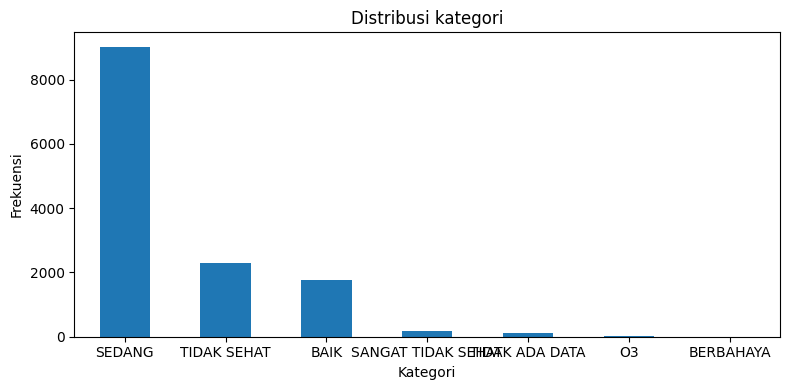

In [10]:
plt.figure(figsize=(8, 4))
df['kategori'].value_counts().plot(kind='bar')
plt.title('Distribusi kategori')
plt.xlabel('Kategori')
plt.ylabel('Frekuensi')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Distribution Chart

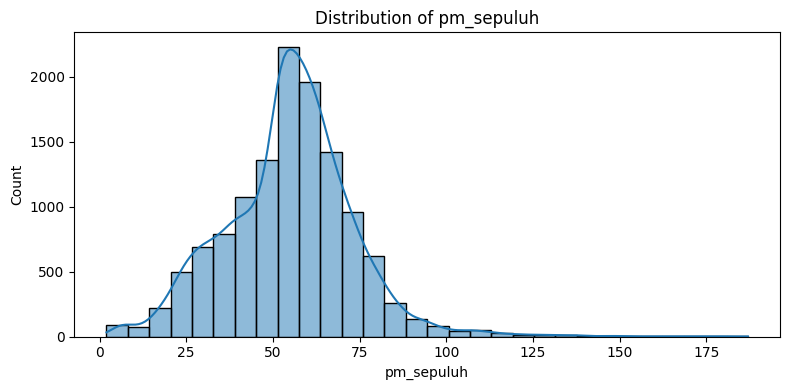

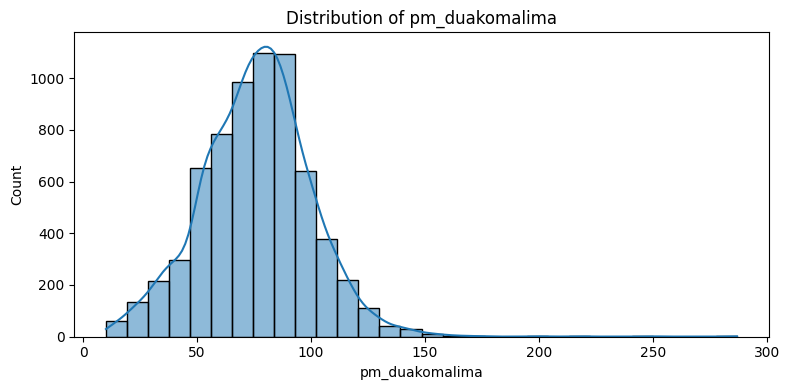

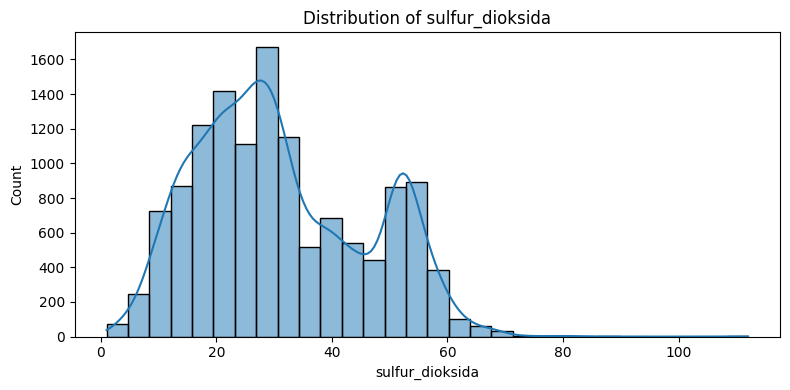

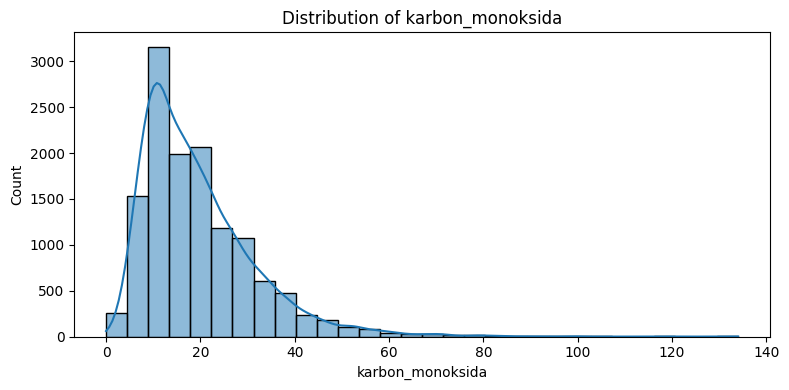

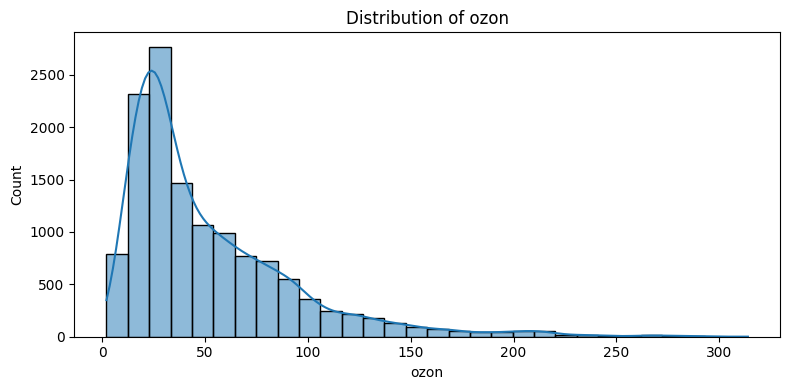

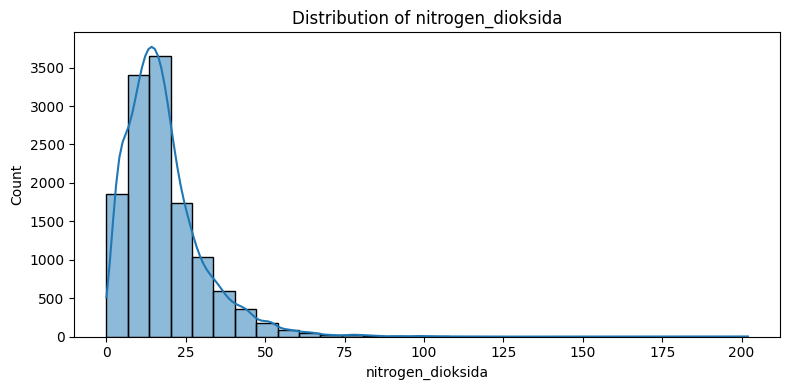

In [11]:
for col in num_cols:
    if col in df.columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.tight_layout()
        plt.show()

### Parameter Type Plot

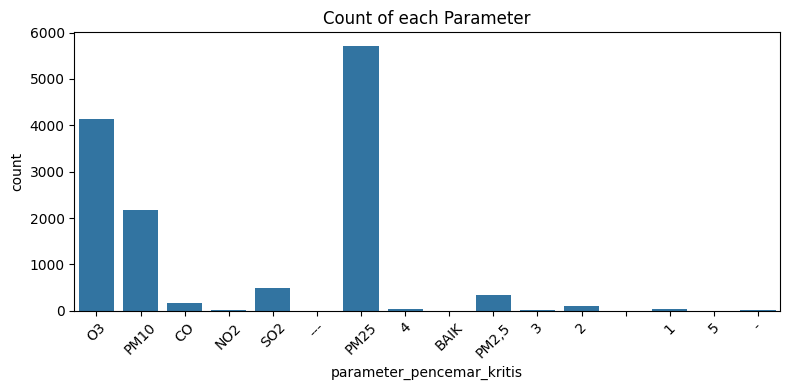

In [12]:
if 'parameter_pencemar_kritis' in df.columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x='parameter_pencemar_kritis', data=df)
    plt.title('Count of each Parameter')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Outlier

In [13]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

outlier_mask = (df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))
outlier_count = outlier_mask.sum()

print("Jumlah outlier per fitur:")
print(outlier_count)

Jumlah outlier per fitur:
pm_sepuluh           367
pm_duakomalima        77
sulfur_dioksida        9
karbon_monoksida     429
ozon                 580
nitrogen_dioksida    623
dtype: int64


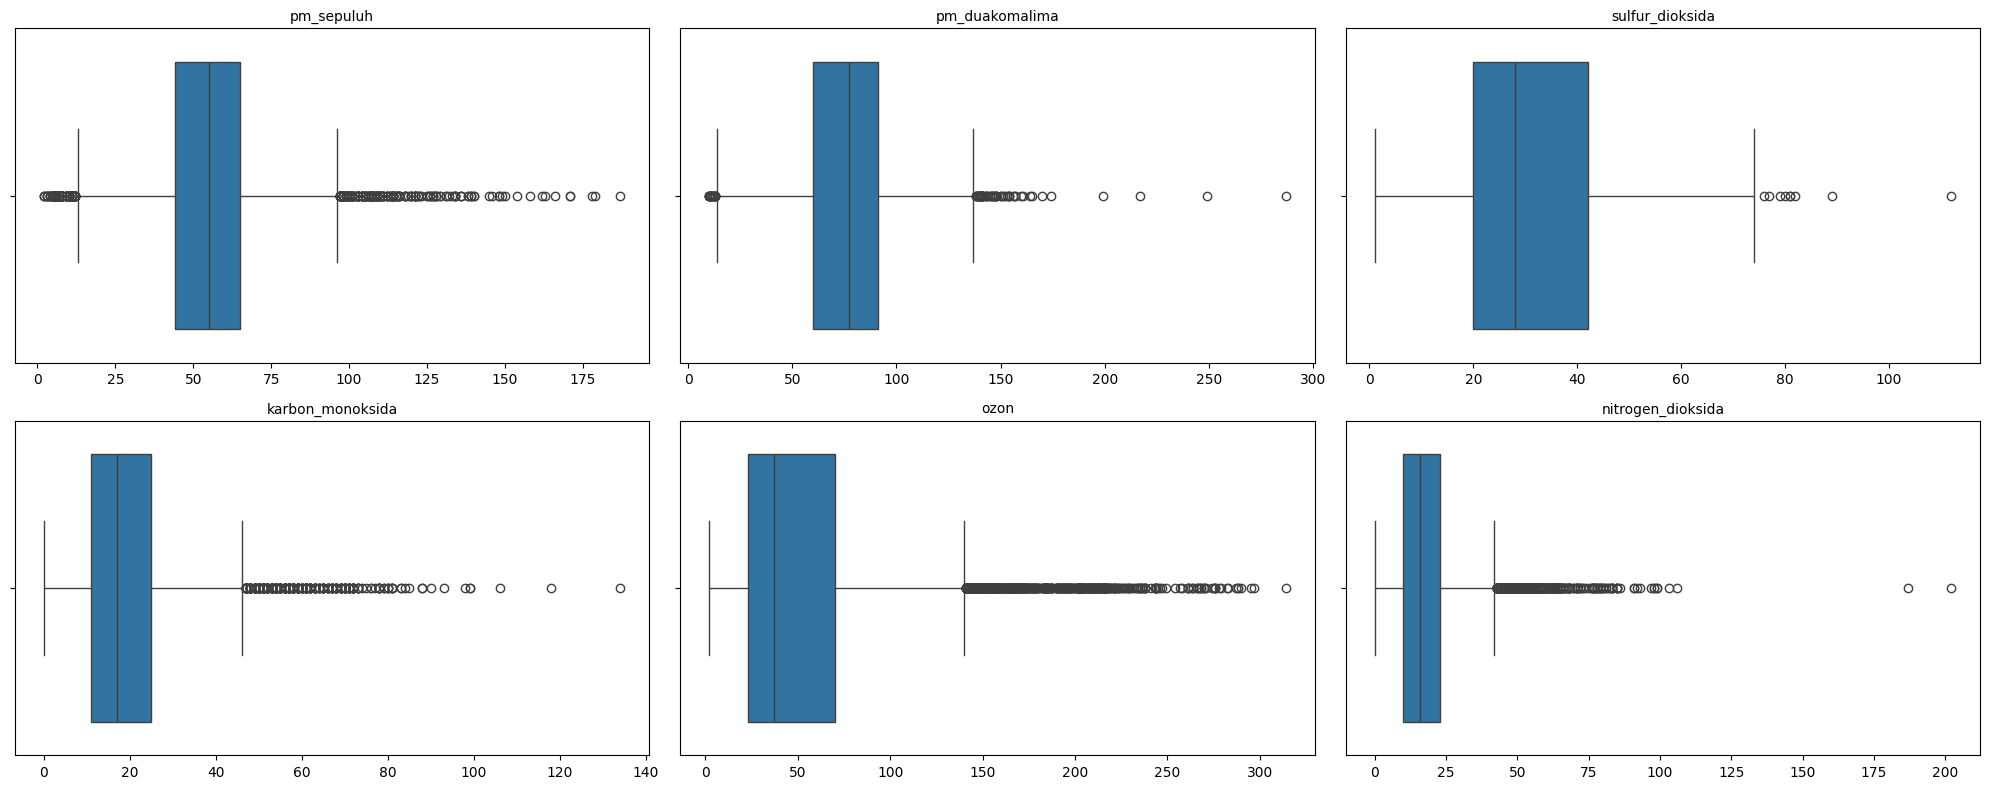

In [14]:
n_cols = 3
n_rows = int(np.ceil(len(num_cols) / n_cols))

plt.figure(figsize=(20, n_rows * 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df[col])
    plt.title(col, fontsize=10)
    plt.xlabel('')
    plt.tight_layout()

plt.show()

### Corr Heatmap

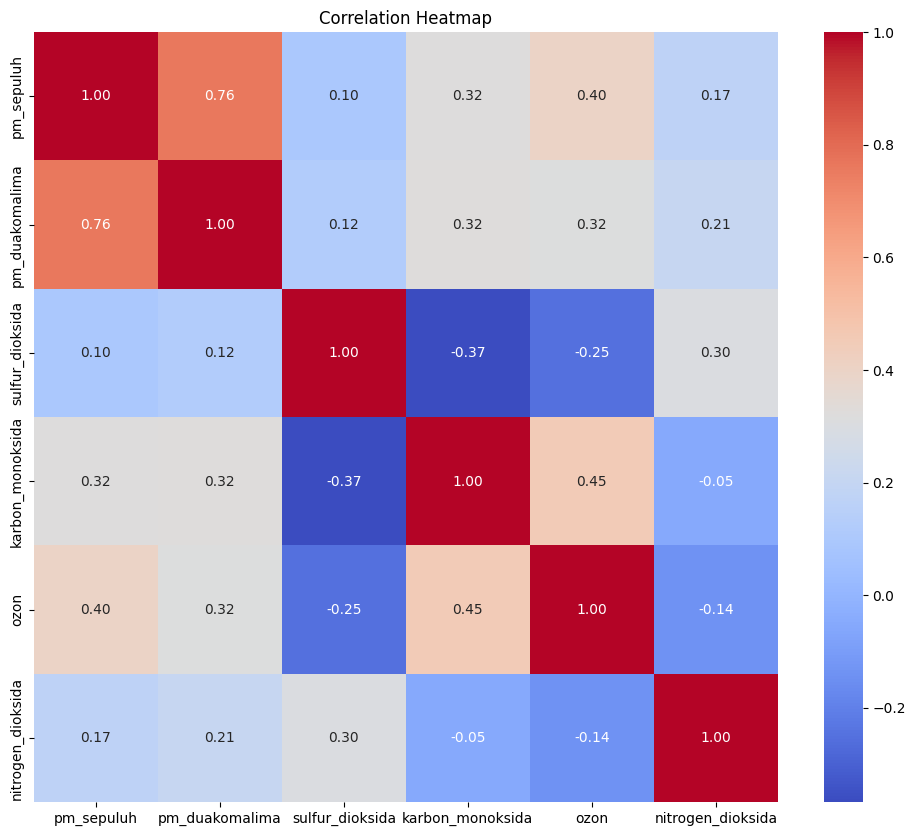

In [15]:
if len(num_cols) >= 4:
    plt.figure(figsize=(12, 10))
    corr = df[num_cols].corr()
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

## Preprocessing

### Cleaning

In [16]:
# drop duplicate
df = df.drop_duplicates()

# drop kategori yang kosong
df = df.dropna(subset=['kategori'])

# drop fitur yang tidak diperlukan
df = df.drop(['periode_data','bulan','tanggal','stasiun', 'max'], axis=1)

# drop kategori tidak ada data dan o3 karena o3 harusnya parameter bukan kategori
df = df[df['kategori'] != 'TIDAK ADA DATA']
df = df[df['kategori'] != 'O3']

# drop kategori < 2
counts = df['kategori'].value_counts()
rare = counts[counts < 2].index
df = df[~df['kategori'].isin(rare)]

In [17]:
print("Distribusi target variabel")
print(df['kategori'].value_counts())

print("\nPersentase:")
print(df['kategori'].value_counts(normalize=True) * 100)

Distribusi target variabel
kategori
SEDANG                9017
TIDAK SEHAT           2278
BAIK                  1764
SANGAT TIDAK SEHAT     188
Name: count, dtype: int64

Persentase:
kategori
SEDANG                68.068242
TIDAK SEHAT           17.196346
BAIK                  13.316223
SANGAT TIDAK SEHAT     1.419189
Name: proportion, dtype: float64


In [18]:
def clean_param(x):
    if pd.isna(x):
        return np.nan

    x = str(x).strip()

    if x in ['PM25', 'PM2,5', 'pm25', 'pm2,5']:
        return 'PM2.5'

    valid = ['PM10', 'PM2.5', 'SO2', 'CO', 'O3', 'NO2']
    if x in valid:
        return x

    if x.isdigit():
        return np.nan

    return np.nan

df['parameter_pencemar_kritis'] = df['parameter_pencemar_kritis'].apply(clean_param)

In [19]:
print("Distribusi parameter")
print(df['parameter_pencemar_kritis'].value_counts())

print("\nPersentase:")
print(df['parameter_pencemar_kritis'].value_counts(normalize=True) * 100)

Distribusi parameter
parameter_pencemar_kritis
PM2.5    6051
O3       4130
PM10     2173
SO2       494
CO        177
NO2        24
Name: count, dtype: int64

Persentase:
parameter_pencemar_kritis
PM2.5    46.371369
O3       31.649935
PM10     16.652617
SO2       3.785731
CO        1.356426
NO2       0.183922
Name: proportion, dtype: float64


In [20]:
df.describe()

,pm_sepuluh,pm_duakomalima,sulfur_dioksida,karbon_monoksida,ozon,nitrogen_dioksida
count,12620.000000,6757.000000,13009.000000,13060.000000,13035.000000,12999.000000
mean,54.819255,76.021163,31.133292,19.409035,51.774223,18.087622
std,18.586185,23.970946,14.629251,11.845500,41.716245,12.382848
min,2.000000,10.000000,1.000000,0.000000,2.000000,0.000000
25%,44.000000,60.000000,20.000000,11.000000,23.000000,10.000000
50%,56.000000,77.000000,29.000000,17.000000,37.000000,16.000000
75%,65.000000,91.000000,42.000000,25.000000,70.000000,23.000000
max,187.000000,287.000000,112.000000,134.000000,297.000000,202.000000


### Imputasi

In [21]:
print("Missing value:")
print(df.isnull().sum())

Missing value:
parameter_pencemar_kritis     198
kategori                        0
pm_sepuluh                    627
pm_duakomalima               6490
sulfur_dioksida               238
karbon_monoksida              187
ozon                          212
nitrogen_dioksida             248
dtype: int64


imputasi kolom numerik menggunakan median karena robust terhadap outlier

In [22]:
for col in num_cols:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)

imputasi kolom kategorikal (parameter_pencemar_kritis) menggunakan modus

In [23]:
cat_cols = ['parameter_pencemar_kritis']

for col in cat_cols:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)

In [24]:
print("Missing value:")
print(df.isna().sum())

Missing value:
parameter_pencemar_kritis    0
kategori                     0
pm_sepuluh                   0
pm_duakomalima               0
sulfur_dioksida              0
karbon_monoksida             0
ozon                         0
nitrogen_dioksida            0
dtype: int64


### Splitting

In [25]:
X = df.drop('kategori', axis=1)
y = df['kategori']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [26]:
print("Distribusi y_train:")
print(y_train.value_counts())

print("\nDistribusi y_test:")
print(y_test.value_counts())

Distribusi y_train:
kategori
SEDANG                7213
TIDAK SEHAT           1822
BAIK                  1411
SANGAT TIDAK SEHAT     151
Name: count, dtype: int64

Distribusi y_test:
kategori
SEDANG                1804
TIDAK SEHAT            456
BAIK                   353
SANGAT TIDAK SEHAT      37
Name: count, dtype: int64


### Encoding

In [27]:
le = LabelEncoder()

y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

print("Kategori:", dict(zip(le.classes_, le.transform(le.classes_))))

Kategori: {'BAIK': 0, 'SANGAT TIDAK SEHAT': 1, 'SEDANG': 2, 'TIDAK SEHAT': 3}


In [28]:
le_cat = LabelEncoder()

X_train['parameter_pencemar_kritis'] = le_cat.fit_transform(X_train['parameter_pencemar_kritis'])
X_test['parameter_pencemar_kritis'] = le_cat.transform(X_test['parameter_pencemar_kritis'])

print("Parameter:", dict(zip(le_cat.classes_, le_cat.transform(le_cat.classes_))))

Parameter: {'CO': 0, 'NO2': 1, 'O3': 2, 'PM10': 3, 'PM2.5': 4, 'SO2': 5}


### Scaling

In [29]:
scaler = RobustScaler()
X_train_num_scaled = scaler.fit_transform(X_train[num_cols])
X_test_num_scaled = scaler.transform(X_test[num_cols])

X_train_scaled_df = pd.DataFrame(X_train_num_scaled, columns=num_cols, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_num_scaled, columns=num_cols, index=X_test.index)

X_train_cat = X_train[['parameter_pencemar_kritis']]
X_test_cat = X_test[['parameter_pencemar_kritis']]

X_train_scaled = pd.concat([X_train_scaled_df, X_train_cat], axis=1)
X_test_scaled = pd.concat([X_test_scaled_df, X_test_cat], axis=1)

## Modeling

### SVM

In [30]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.001],
    'kernel': ['rbf'],
    'class_weight': [None, 'balanced']
}

svm = SVC(probability=True, random_state=42)

grid_search = GridSearchCV(
    svm,
    param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_scaled, y_train_enc)

print("Best Parameters:", grid_search.best_params_)
print("Best Score (F1-weighted):", grid_search.best_score_)

best_svm = grid_search.best_estimator_

svm_pred = best_svm.predict(X_test_scaled)

print("\nFinal Evaluation on Test Data:")
print("Accuracy:", accuracy_score(y_test_enc, svm_pred))
print("Precision (weighted):", precision_score(y_test_enc, svm_pred, average='weighted'))
print("Recall (weighted):", recall_score(y_test_enc, svm_pred, average='weighted'))
print("F1-Score (weighted):", f1_score(y_test_enc, svm_pred, average='weighted'))

print("\nClassification Report:")
print(classification_report(y_test_enc, svm_pred, target_names=le.classes_))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters: {'C': 100, 'class_weight': None, 'gamma': 'auto', 'kernel': 'rbf'}
Best Score (F1-weighted): 0.976650179995263

Final Evaluation on Test Data:
Accuracy: 0.9766037735849057
Precision (weighted): 0.9764905125685595
Recall (weighted): 0.9766037735849057
F1-Score (weighted): 0.9765246181933366

Classification Report:
                    precision    recall  f1-score   support

              BAIK       0.94      0.92      0.93       353
SANGAT TIDAK SEHAT       0.97      0.95      0.96        37
            SEDANG       0.98      0.99      0.98      1804
       TIDAK SEHAT       0.98      0.99      0.98       456

          accuracy                           0.98      2650
         macro avg       0.97      0.96      0.97      2650
      weighted avg       0.98      0.98      0.98      2650



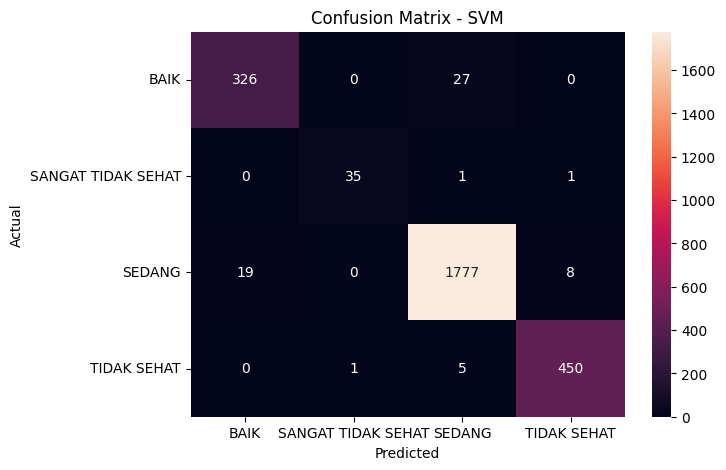

In [31]:
plt.figure(figsize=(7,5))
cm = confusion_matrix(y_test_enc, svm_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Naive Bayes

In [32]:
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
}

nb = GaussianNB()

grid_nb = GridSearchCV(
    nb,
    param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=2
)

grid_nb.fit(X_train_scaled, y_train_enc)

print("Best parameters:", grid_nb.best_params_)
print("Best cross-val score (F1-weighted):", grid_nb.best_score_)

best_nb = grid_nb.best_estimator_

nb_pred = best_nb.predict(X_test_scaled)

print("\nFinal Evaluation on Test Data:")
print("Accuracy:", accuracy_score(y_test_enc, nb_pred))
print("Precision (weighted):", precision_score(y_test_enc, nb_pred, average='weighted'))
print("Recall (weighted):", recall_score(y_test_enc, nb_pred, average='weighted'))
print("F1-Score (weighted):", f1_score(y_test_enc, nb_pred, average='weighted'))

print("\nClassification Report:")
print(classification_report(y_test_enc, nb_pred, target_names=le.classes_))

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best parameters: {'var_smoothing': 1e-09}
Best cross-val score (F1-weighted): 0.8359563639183536

Final Evaluation on Test Data:
Accuracy: 0.8267924528301887
Precision (weighted): 0.8320947145357803
Recall (weighted): 0.8267924528301887
F1-Score (weighted): 0.8283022888057695

Classification Report:
                    precision    recall  f1-score   support

              BAIK       0.66      0.73      0.70       353
SANGAT TIDAK SEHAT       0.56      0.97      0.71        37
            SEDANG       0.89      0.87      0.88      1804
       TIDAK SEHAT       0.76      0.72      0.74       456

          accuracy                           0.83      2650
         macro avg       0.72      0.82      0.76      2650
      weighted avg       0.83      0.83      0.83      2650



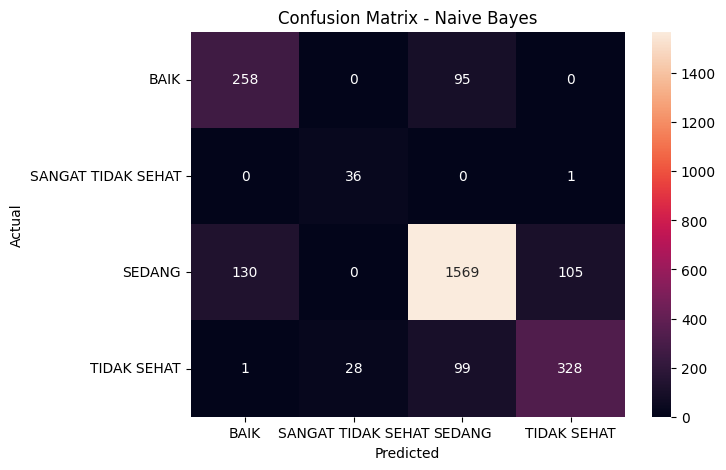

In [33]:
plt.figure(figsize=(7,5))
cm = confusion_matrix(y_test_enc, nb_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Multinomial LogReg

In [34]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'class_weight': [None, 'balanced'],
    'solver': ['lbfgs', 'newton-cg'],
    'max_iter': [500, 1000, 2000]
}

logreg = LogisticRegression(
    multi_class='multinomial',
    n_jobs=-1,
    random_state=42
)

grid_logreg = GridSearchCV(
    logreg,
    param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=2
)

grid_logreg.fit(X_train_scaled, y_train_enc)

print("Best Parameters:", grid_logreg.best_params_)
print("Best F1-Weighted (CV):", grid_logreg.best_score_)

best_logreg = grid_logreg.best_estimator_

logreg_multi_pred = best_logreg.predict(X_test_scaled)

print("\nFinal Evaluation on Test Data:")
print("Accuracy:", accuracy_score(y_test_enc, logreg_multi_pred))
print("Precision (weighted):", precision_score(y_test_enc, logreg_multi_pred, average='weighted'))
print("Recall (weighted):", recall_score(y_test_enc, logreg_multi_pred, average='weighted'))
print("F1-Score (weighted):", f1_score(y_test_enc, logreg_multi_pred, average='weighted'))

print("\nClassification Report:")
print(classification_report(y_test_enc, logreg_multi_pred, target_names=le.classes_))

Fitting 5 folds for each of 60 candidates, totalling 300 fits


C:\Users\AsusS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Best Parameters: {'C': 100, 'class_weight': None, 'max_iter': 500, 'solver': 'newton-cg'}
Best F1-Weighted (CV): 0.8855646475489163

Final Evaluation on Test Data:
Accuracy: 0.8822641509433963
Precision (weighted): 0.880287788506101
Recall (weighted): 0.8822641509433963
F1-Score (weighted): 0.8805088733436126

Classification Report:
                    precision    recall  f1-score   support

              BAIK       0.72      0.65      0.68       353
SANGAT TIDAK SEHAT       0.75      0.89      0.81        37
            SEDANG       0.90      0.94      0.92      1804
       TIDAK SEHAT       0.92      0.86      0.89       456

          accuracy                           0.88      2650
         macro avg       0.82      0.83      0.83      2650
      weighted avg       0.88      0.88      0.88      2650



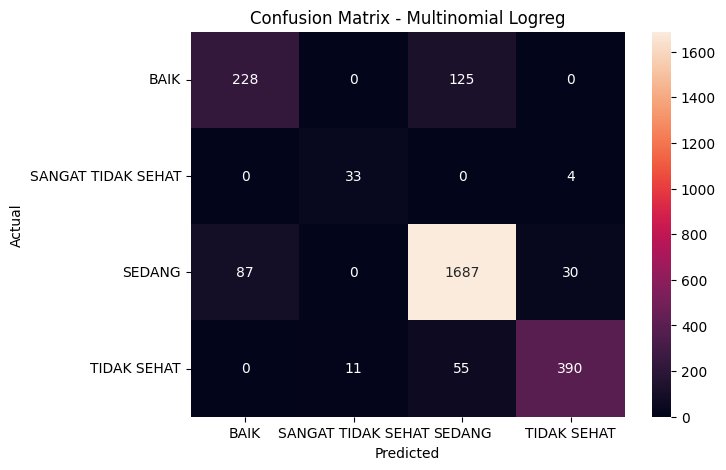

In [35]:
plt.figure(figsize=(7,5))
cm = confusion_matrix(y_test_enc, logreg_multi_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Multinomial Logreg")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### KNN

In [36]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 21, 25],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]
}

knn = KNeighborsClassifier(n_jobs=-1)

grid_knn = GridSearchCV(
    knn,
    param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=2
)

grid_knn.fit(X_train_scaled, y_train_enc)

print("Best Parameters:", grid_knn.best_params_)
print("Best F1-Weighted (CV):", grid_knn.best_score_)

best_knn = grid_knn.best_estimator_

knn_pred = best_knn.predict(X_test_scaled)

print("\nFinal Evaluation on Test Data:")
print("Accuracy:", accuracy_score(y_test_enc, knn_pred))
print("Precision (weighted):", precision_score(y_test_enc, knn_pred, average='weighted'))
print("Recall (weighted):", recall_score(y_test_enc, knn_pred, average='weighted'))
print("F1-Score (weighted):", f1_score(y_test_enc, knn_pred, average='weighted'))

print("\nClassification Report:")
print(classification_report(y_test_enc, knn_pred, target_names=le.classes_))

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Best F1-Weighted (CV): 0.9617963919958825

Final Evaluation on Test Data:
Accuracy: 0.9588679245283019
Precision (weighted): 0.9587941474061301
Recall (weighted): 0.9588679245283019
F1-Score (weighted): 0.9587933264430758

Classification Report:
                    precision    recall  f1-score   support

              BAIK       0.91      0.90      0.90       353
SANGAT TIDAK SEHAT       0.92      0.89      0.90        37
            SEDANG       0.97      0.98      0.97      1804
       TIDAK SEHAT       0.97      0.94      0.95       456

          accuracy                           0.96      2650
         macro avg       0.94      0.93      0.93      2650
      weighted avg       0.96      0.96      0.96      2650



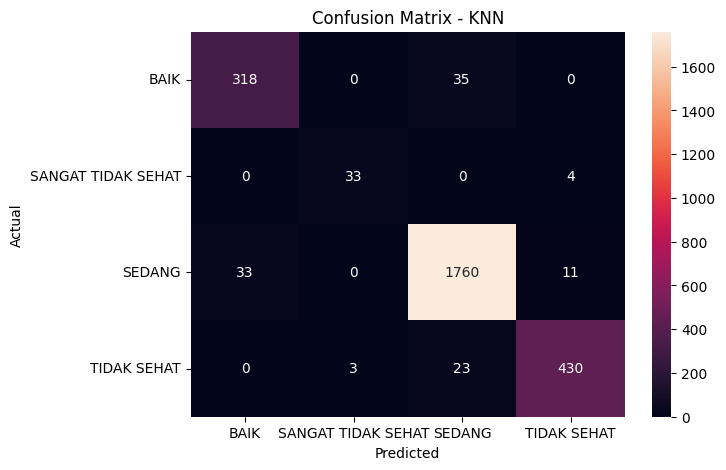

In [37]:
plt.figure(figsize=(7,5))
cm = confusion_matrix(y_test_enc, knn_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### STACKING ENSAMBLE

In [38]:
from sklearn.ensemble import StackingClassifier

estimators_tuned = [
    ('svm', best_svm),       # Mengambil dari hasil grid_search SVM
    ('nb', best_nb),         # Mengambil dari hasil grid_nb
    ('knn', best_knn),       # Mengambil dari hasil grid_knn
    ('logreg', best_logreg)  # Mengambil dari hasil grid_logreg
]

stacking_clf = StackingClassifier(
    estimators=estimators_tuned,
    final_estimator=LogisticRegression(random_state=42),
    cv=5,
    n_jobs=-1
)

stacking_clf.fit(X_train_scaled, y_train_enc)

stack_pred = stacking_clf.predict(X_test_scaled)

print("\nFinal Evaluation on Test Data:")
print("Accuracy           :", accuracy_score(y_test_enc, stack_pred))
print("Precision (weighted):", precision_score(y_test_enc, stack_pred, average='weighted'))
print("Recall (weighted)   :", recall_score(y_test_enc, stack_pred, average='weighted'))
print("F1-Score (weighted) :", f1_score(y_test_enc, stack_pred, average='weighted'))

print("\nClassification Report Stacking:")
print(classification_report(y_test_enc, stack_pred, target_names=le.classes_))


Final Evaluation on Test Data:
Accuracy           : 0.979622641509434
Precision (weighted): 0.9795226509708599
Recall (weighted)   : 0.979622641509434
F1-Score (weighted) : 0.9795242607630077

Classification Report Stacking:
                    precision    recall  f1-score   support

              BAIK       0.96      0.93      0.94       353
SANGAT TIDAK SEHAT       0.97      0.97      0.97        37
            SEDANG       0.98      0.99      0.99      1804
       TIDAK SEHAT       0.99      0.98      0.98       456

          accuracy                           0.98      2650
         macro avg       0.98      0.97      0.97      2650
      weighted avg       0.98      0.98      0.98      2650



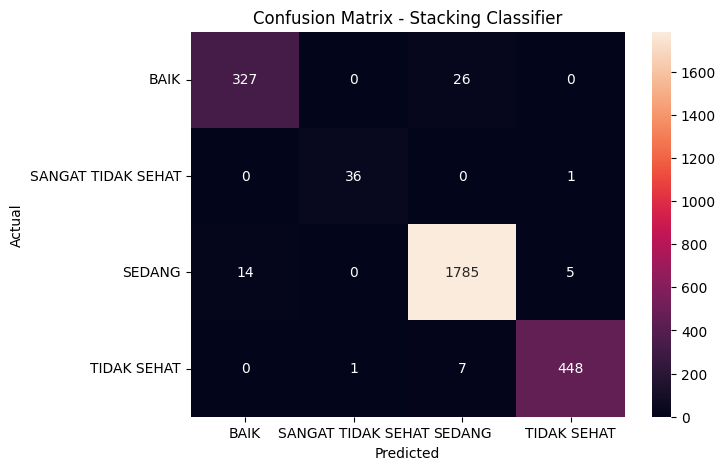

In [40]:
plt.figure(figsize=(7,5))
cm = confusion_matrix(y_test_enc, stack_pred)
sns.heatmap(cm, annot=True, fmt='d', 
            xticklabels=le.classes_, 
            yticklabels=le.classes_)
plt.title("Confusion Matrix - Stacking Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()